In [1]:
import pandas as pd
%matplotlib inline
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np


### Parser for date parsing

In [2]:
def parser(x):
#     a = str(x)
#     a = x.split(":")[0]
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [3]:
df = pd.read_excel(r'C:\Users\HIM\Desktop\Toxic\Problem statement.xlsx',parse_dates=[0] ,  date_parser=parser)

### Removing rows which have same timestamps

In [4]:
df = df[~df.duplicated(subset='Timestamp')]

### Function to remove rows where fuel decreases without increase in cumulative distance

In [5]:
def check(df):
    a = []
    for i in range(df.shape[0]):
        #comparing distance values whether are same or not
        if df['Cumulative Distance'].iloc[i] == df['Cumulative Distance'].iloc[i-1]:
            #comparing fuel values if they decrease or not
            if df['Fuel Level (mV)'].iloc[i] < df['Fuel Level (mV)'].iloc[i-1]:
                #append false to list if fuel decreases
                a.append(False)
            else:
                a.append(True)
        else:
            a.append(True)
            
    #return list to remove noisy rows
    return a

In [6]:
a = check(df)

In [7]:
new = df[a]

### Function to remove rows where fuel decreases by more than 50% of the fuel and cummulative distance is increased by less than 100

In [8]:
def check2(df):
    b = []
    for i in range(df.shape[0]):
        #comparing the decrease in fuel
        if df['Fuel Level (mV)'].iloc[i] < (df['Fuel Level (mV)'].iloc[i-1]*.5):
            #if distance increased is less than 100
            if (df['Cumulative Distance'].iloc[i] - df['Cumulative Distance'].iloc[i-1]) < 100:
                #append False
                b.append(False)
            else:
                b.append(True)
        else:
            b.append(True)
            
    return b

In [9]:
b = check2(new)

In [10]:
final = new[b]

### Graph

In [13]:
final = final.set_index('Timestamp')

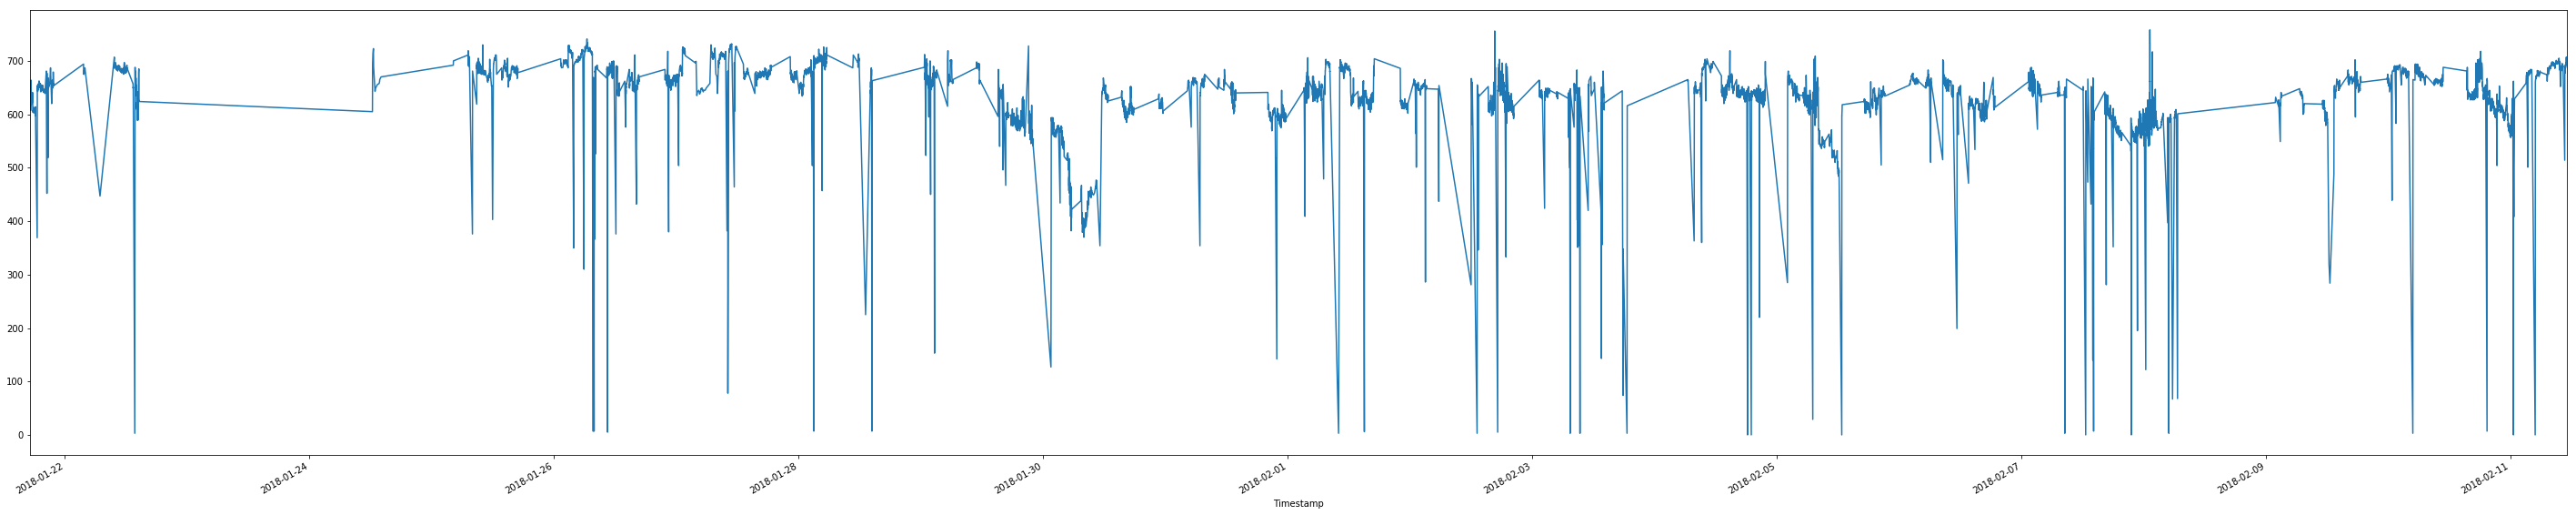

In [14]:
plt.figure(figsize=(50,10))
final['Fuel Level (mV)'].plot()

### I have only worked with classification problems till now, So the solution may not be good. I have done what I have understood from the problem that is to remove errors and noisy data from the datasets for the predictions.

### Please share your views if  possible